GRADED CHALLENGE 3

---



# **ALDANDI FITRA RAMADHAN HCK-04**

---



---

Menggunakan database thelook_ecommerce.

#PROBLEM STATEMENT

**Mengatahui jumlah user thelook_ecommerce mempengaruhi total revenue tiap bulannya juga dapat mempengaruhi penambahan revenue pada Q4**

# SMART

---


*   SPECIFIC : Apakah dengan penambahan user terus menerus bisa menambahkan revenue pada Q4?
*   MEASUREABLE : Dengan memperhitungkan Q1-Q3 tiap bulannya, setidaknya memiliki penambahan user bulan berikutnya.
*   ACHIVEABLE : Jika dilihat perhitungan Q1-Q3, user terjadi kenaikan tiap bulannya.
*   RELEVANT : Berdasarkan Q1-Q3, user dan revenue terus terjadi kenaikan yang menyimpulkan user mempengaruhi revenue yang dihasilkan.
*   TIMEBOUND : Karena membutuhkan data Q1-Q3, timebound-nya adalah sampai Q3 pada tahun 2022






In [1]:
#mengkoneksikan BigQuery ke google colab ini.
from google.colab import auth
from google.cloud import bigquery

auth.authenticate_user()
print('Authenticated')

project_id = "hacktiv8-alnamez" #merupakan GCP PROJECT-ID pada BigQuery
client = bigquery.Client(project=project_id)

Authenticated


*telah berhasil mengkoneksikan dari BigQuery project hacktiv9-alnamez dengan google colab ini*

# 1

---

**Jumlah transaksi yang berstatus Complete tiap bulan selama Q1 sampai Q3 di tahun 2022**

---



In [2]:
one = client.query('''
select year,
       month,
       status,
       count(distinct order_id) as totaltransaction # menghitung total transaksi dari kolom order_id
from (select *,                                 # membuat subs query
      extract(month from created_at) as month,  # yang sudah ditambahkan kolom month,year, quarter
      extract(year from created_at) as year,    # menggunakan func extract dari dtype timestamp yaitu created_at
      extract(quarter from created_at) as quarter
    from bigquery-public-data.thelook_ecommerce.order_items
    where extract(year from created_at) = 2022) as subs
where status = 'Complete' and quarter <= 3 # ingin me-query yang berstatus complete dan Q1-Q3
group by year,month,status # count(distinct order_id) dikelompokan berdasarkan year.month, dan status untuk melihat saja bahwa semua status complete
order by year,month  # diurutkan berdasarkan year month
''').to_dataframe()
one

,year,month,status,totaltransaction
0,2022,1,Complete,858
1,2022,2,Complete,793
2,2022,3,Complete,1017
3,2022,4,Complete,933
4,2022,5,Complete,1072
5,2022,6,Complete,1083
6,2022,7,Complete,1259
7,2022,8,Complete,1297
8,2022,9,Complete,1385




---

Dari hasil diatas kita dapat ketahui bahwa selalu terjadi trend kenaikan tiap bulan, dapat dibuktikan dari hasil diatas yang saya urutkan dari bulan terkecil dan terus terjadi kenaikan jumlah transaksi. Terkecuali pada bulan februari dan pada bulan juni terjadi penurunan



---


---




---

# 2

---



**Total penjualan (dalam USD) tiap bulan selama Q1 sampai Q3 di tahun 2022**

---



In [3]:
two = client.query('''
select year,
       month,
       status,
       sum(sale_price) as totalrevenue
from (select *,                                 # membuat subs query
      extract(month from created_at) as month,  # yang sudah ditambahkan kolom month,year, quarter
      extract(year from created_at) as year,    # menggunakan func extract dari dtype timestamp yaitu created_at
      extract(quarter from created_at) as quarter
    from bigquery-public-data.thelook_ecommerce.order_items
    where extract(year from created_at) = 2022) as subs
where status = 'Complete' and quarter <= 3 # ingin me-query yang berstatus complete dan Q1-Q3
group by year,month,status # sum(sale_price) dikelompokan berdasarkan year.month, dan status untuk melihat saja bahwa semua status complete
order by year,month  # diurutkan berdasarkan year month
''').to_dataframe()
two

,year,month,status,totalrevenue
0,2022,1,Complete,73115.839958
1,2022,2,Complete,60194.720048
2,2022,3,Complete,87890.740084
3,2022,4,Complete,73997.130068
4,2022,5,Complete,94902.530049
5,2022,6,Complete,88124.680081
6,2022,7,Complete,107516.360184
7,2022,8,Complete,107630.400033
8,2022,9,Complete,116001.370087




---

Dari hasil diatas kita dapat simpulkan bahwa totalrevenue berkolerasi antara totaltransaction karena menghasilkan hasil yang sama yaitu kenaikan tiap bulannya kecuali pada bulan februari dan juni terjadi penurunan.

---



---



---



# 3

---

**User yang melakukan transaksi berstatus Complete di tiap bulan dari Q1 sampai Q3 2022**

In [4]:
three = client.query('''
select year,
       month,
       status,
       count(distinct user_id) as totaluser #menggunakan distinct karena bisa saja user yang sama melakukan 2 transaksi
from (select *,                                 # membuat subs query
      extract(month from created_at) as month,  # yang sudah ditambahkan kolom month,year, quarter
      extract(year from created_at) as year,    # menggunakan func extract dari dtype timestamp yaitu created_at
      extract(quarter from created_at) as quarter
    from bigquery-public-data.thelook_ecommerce.order_items
    where extract(year from created_at) = 2022) as subs
where status = 'Complete' and quarter <= 3 # ingin me-query yang berstatus complete dan Q1-Q3
group by year,month,status # count(distinct user_id) dikelompokan berdasarkan year.month, dan status untuk melihat saja bahwa semua status complete
order by year,month  # diurutkan berdasarkan year month
''').to_dataframe()
three

,year,month,status,totaluser
0,2022,1,Complete,850
1,2022,2,Complete,786
2,2022,3,Complete,1009
3,2022,4,Complete,924
4,2022,5,Complete,1066
5,2022,6,Complete,1072
6,2022,7,Complete,1248
7,2022,8,Complete,1285
8,2022,9,Complete,1370




---

Insight dari hasil diatas dapat dikatakan totaltransaction, totalrevenue, dan totaluser merupakan kolom yang saling berkolerasi karena hasil diatas juga terdapat penurunan pada bulan februari dan juni. Lalu, revenue,transaksi, dan user terbesar pada bulan 9 untuk quarter 1 sampai quarter 3 pada tahun 2022

---

---



---





# 4

---
**Kategori produk yang paling banyak dibeli (status transaksi: Complete) di tiap bulannya selama Q1 sampai Q3 tahun 2022**

---



In [5]:
four = client.query('''
select year, month, product_category, totaltransaction_perproduct, status
from (
  select #subs query agar bisa memanggil "rank" pada where di main query
    year,
    month,
    status,
    product_category,
    count(distinct order_id) as totaltransaction_perproduct, # menghitung jumlah order_id berdasarkan produkkategori pada group by
    rank() over(partition by month order by count(distinct order_id) desc, product_category) as rank #dipartisi tiap bulannya lalu di hitung total order_idnya dan diurutkan dari yang terbesar(desc) untuk menjadi ranking 1 dan dikelompokan berdasarkan product category yang artinya hanya diambil 1 jika ada 2 hasil yang sama
   from (select *,                                 # membuat subs query
      extract(month from created_at) as month,  # yang sudah ditambahkan kolom month,year, quarter
      extract(year from created_at) as year,    # menggunakan func extract dari dtype timestamp yaitu created_at
      extract(quarter from created_at) as quarter
    from `bigquery-public-data.thelook_ecommerce.order_items`
    where extract(year from created_at) = 2022 and extract(quarter from created_at) <= 3
    and status = 'Complete' #ingin me-query yang berstatus complete dan Q1-Q3 pada tahun 2022
  ) as items
  join `bigquery-public-data.thelook_ecommerce.inventory_items` as inv_items #inner join dengan data inventory_items
  on items.product_id = inv_items.product_id                                # berdasarkan product_id karena memilki isi yang sama
  group by year, month, product_category, status #dikelompokan berdasarkan year,month,kategori dan status untuk melihat saja bahwa semua status complete
) as order_counts
where rank = 1 # hanya ingin yang ranking = 1 karena itu merupakan jumlah terbesar
order by month
''').to_dataframe()
four

,year,month,product_category,totaltransaction_perproduct,status
0,2022,1,Jeans,88,Complete
1,2022,2,Intimates,83,Complete
2,2022,3,Sweaters,103,Complete
3,2022,4,Intimates,112,Complete
4,2022,5,Sleep & Lounge,104,Complete
5,2022,6,Intimates,107,Complete
6,2022,7,Jeans,126,Complete
7,2022,8,Intimates,139,Complete
8,2022,9,Shorts,140,Complete




---

Dari hasil diatas dapat diketahui bahwa pada tahun 2022 total transaksi paling tinggi adalah kategori Jeans pada bulan 1,4,5,6 2022 dan terendah yaitu Fashion Hoodies&Sweatshirts pada bulan Februari 2022. Selain itu, terjadi trend kenaikan pada bulan maret sampai september pada tahun 2022 untuk Q1-Q3.



---



---



---

# 5

---
**Kategori produk yang paling banyak mendapatkan pendapatan (staus transaksi: Complete) di tiap bulannya selama Q1 sampai Q3 tahun 2022**




---



In [6]:
five = client.query('''
select year, month, product_category, totalrevenue_perproduct, status
from (
  select #subs query agar bisa memanggil "rank" pada where di main query
    year,
    month,
    status,
    product_category,
    sum(sale_price) as totalrevenue_perproduct, # menghitung jumlah saleprice berdasarkan produkkategori pada group by
    rank() over(partition by month order by sum(sale_price) desc, product_category) as rank #dipartisi tiap bulannya lalu di hitung total order_idnya dan diurutkan dari yang terbesar(desc) untuk menjadi ranking 1 dan dikelompokan berdasarkan product category yang artinya hanya diambil 1 jika ada 2 hasil yang sama
   from (select *,                                 # membuat subs query
      extract(month from created_at) as month,  # yang sudah ditambahkan kolom month,year, quarter
      extract(year from created_at) as year,    # menggunakan func extract dari dtype timestamp yaitu created_at
      extract(quarter from created_at) as quarter
    from `bigquery-public-data.thelook_ecommerce.order_items`
    where extract(year from created_at) = 2022 and extract(quarter from created_at) <= 3
    and status = 'Complete' #ingin me-query yang berstatus complete dan Q1-Q3 pada tahun 2022
  ) as items
  join `bigquery-public-data.thelook_ecommerce.inventory_items` as inv_items #inner join dengan data inventory_items
  on items.product_id = inv_items.product_id                                # berdasarkan product_id karena memilki isi yang sama
  group by year, month, product_category, status #dikelompokan berdasarkan year,month,kategori dan status untuk melihat saja bahwa semua status complete
) as order_counts
where rank = 1 # hanya ingin yang ranking = 1 karena itu merupakan jumlah terbesar
order by month
''').to_dataframe()
five

,year,month,product_category,totalrevenue_perproduct,status
0,2022,1,Outerwear & Coats,183507.089586,Complete
1,2022,2,Outerwear & Coats,146856.210499,Complete
2,2022,3,Outerwear & Coats,258771.699392,Complete
3,2022,4,Outerwear & Coats,161963.019941,Complete
4,2022,5,Outerwear & Coats,249528.548973,Complete
5,2022,6,Outerwear & Coats,220091.439932,Complete
6,2022,7,Outerwear & Coats,274005.790598,Complete
7,2022,8,Jeans,277339.590021,Complete
8,2022,9,Outerwear & Coats,314483.019552,Complete




---

Dari hasil diatas dapat dikatakan kategori produk Outerwear&Coats adalah penghasil revenue terbesar selama Q1-Q3 pada tahun 2022 dan diikut oleh Jeans. Selain itu, terus terjadi kenaikan revenue tiap bulannya keuali pada bulan Maret dan Mei terjadi penurunan.

---



---



---



# 6

---



**Dibandingkan dengan jumlah transaksi dan total penjualan, mana yang paling berkaitan dengan jumlah user yang melakukan transaksi? Apa analisis yang dapat kamu jelaskan?**

---



In [7]:
#import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
one_to_three = pd.merge(three, one, on=['month','year', 'status'], how='inner')  #innerjoin dataframe berdasarkan monthyear karena mempunyai range yg sama yaitu 9bulan
one_to_three

,year,month,status,totaluser,totaltransaction
0,2022,1,Complete,850,858
1,2022,2,Complete,786,793
2,2022,3,Complete,1009,1017
3,2022,4,Complete,924,933
4,2022,5,Complete,1066,1072
5,2022,6,Complete,1072,1083
6,2022,7,Complete,1248,1259
7,2022,8,Complete,1285,1297
8,2022,9,Complete,1370,1385


In [9]:
one_to_three = pd.merge(one_to_three, two, on=['month','year', 'status'], how='inner') #innerjoin dataframe berdasarkan monthyear karena mempunyai range yg sama yaitu 9bulan
one_to_three

,year,month,status,totaluser,totaltransaction,totalrevenue
0,2022,1,Complete,850,858,73115.839958
1,2022,2,Complete,786,793,60194.720048
2,2022,3,Complete,1009,1017,87890.740084
3,2022,4,Complete,924,933,73997.130068
4,2022,5,Complete,1066,1072,94902.530049
5,2022,6,Complete,1072,1083,88124.680081
6,2022,7,Complete,1248,1259,107516.360184
7,2022,8,Complete,1285,1297,107630.400033
8,2022,9,Complete,1370,1385,116001.370087


In [12]:
one_to_three['totaluser'].sum()

9610

In [10]:
# menghitung correlation matrix
corr_matrix = one_to_three.corr()


print(corr_matrix)

                  year     month  totaluser  totaltransaction  totalrevenue
year               NaN       NaN        NaN               NaN           NaN
month              NaN  1.000000   0.956249          0.956885      0.903199
totaluser          NaN  0.956249   1.000000          0.999967      0.984688
totaltransaction   NaN  0.956885   0.999967          1.000000      0.983638
totalrevenue       NaN  0.903199   0.984688          0.983638      1.000000


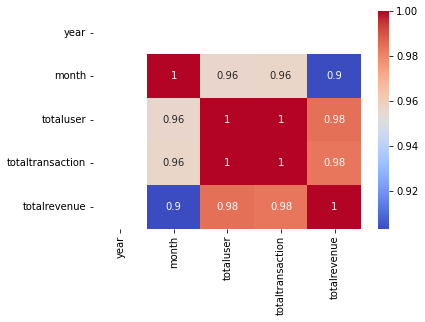

In [11]:
# plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# display plot
plt.show()



---

Dari hasil diatas dapat di buktikan bahwa


*   totaluser dengan totaltransaction merupakan saling mempengaruhi karena nilai korelasi kedua kolom tersebut adalah 1. Dimana yang artinya sangat berkorelasi. **Dapat disimpulkan bahwa totaluser sangat mempengaruhi totaltransaction.**
*   totalrevenue juga berkorelasi dengan totaluser dan totaltransaction yang mempunyai nilai korelasi sebesar 0.98 merupakan hasil yang medndekati 1. **Dimana berarti totaluser mempengaruhi totalrevenue begitu juga totaltransaction mempnegaruhi totalrevenue**


---



---



---



---



---




# POIN ANALYSIS

Dari analisis yang dilakukan dapat disimpulkan bahwa


*   totaluser, totaltransaction terjadi penurunan yang sama pada kedua tersebut yaitu pada bulan Februari dan Juni 2022

---

*   Revenue terbesar di kuasai oleh Outerwear & Coats padahal total transaksi terbanyak ada pada produk Jeans. Dari situ dapat disimpulkan bahwa Outerwear & Coats mempunyai harga yang lebih tinggi dr yang lainnya.

---

*   Untuk totaluser, totaltransaction, dan totalrevenue memilki nilai korelasi yang tinggi dimana dapat disimpulkan total user mempunyai pengaruh yang tinggi terhadap total transaksi dan revenue







---
# PERTANYAAN


---




**`1`**
`Apakah problem statement yang kamu definisikan di awal dapat terukur ketercapaiannya? berikan pendapatmu!`

Menurut saya dapat terukur kecapaiannya dilihat dari hasil anaalisis Q1 sampai Q3 pada tahun 2022, terbukti bahwa selalu terjadi trend kenaikan antara jumlah User dan juga Revenue, sehingga bisa pada Q4 terjadi kenaikan juga pada bulan berikutnya untuk User dan Revenue.

**`2`**
`Berdasarkan hasil analisis yang sudah kamu lakukan dari 6 penjabaran di atas, jika CEO perusahaanmu ingin menargetkan pendapatan di awal kuartal 4 harus mencapai $250000, apakah masuk akal?`

Menurut saya tidak masuk akal untuk awal Q4, dikarenakan jika dilihat dari hasil analisis yang sudah dilakukan, kenaikan dari awal bulan Q1 sampai akhir Q3 hanya sekitar 50% dan tiap bulannya paling besar hanya 35%. Untuk mencapai $250.000 pada awal Q4 dibutuhkan kenaikan sebesar 50% lebih dari pendapatan akhir Q3, padahal untuk kenaikan 50% dari analisis sebelumnya diperlukan waktu 9 bulan.

**`3`**
`CEO kamu menargetkan di kuartal 4 ada investor yang dapat menyuntikan dana ke perusahaanmu, dimana investor akan melihat GMV selama 3 kuartal terakhir serta prospek kedepan minimal di kuartal 4 akan seperti apa. Berikan informasi kepada CEO mu berdasarkan trend transaksi, jumlah user yang bertransaksi, dan GMV 3 kuartal terakhir, apakah perusahaanmu layak atau tidak mendapatkan investor baru!`

Dear CEO, Dari hasil analisis saya, kita membutuhkan investor baru karena perushaan ini menghasilkan hasil yang bagus yang dapat mengundang investor untuk dapat berinvestasi sehingga perusahaan ini menjadi lebih baik lagi.

* Berikut adalah alasan mengapa kita membutuhkan investor baru


1.   Terjadi Trend kenaikan tiap bulannya pada kuartal 1 sampai 3 untuk jumlah User, jumlah transaksi dan total revenue. Jika kita mendapatkan investor baru yang dapat menyuntikan dana besar sehingga dapat melakukan marketing besar-besaran dan dapat meningkatkan jumlah User. Karena jumlah user sangat mempengaruhi revenue.
2.   Jumlah user untuk kuartal 1 - 3 adalah 9610 User, dimana hal tersebut merupakan jumlah dari kenaikan User tiap bulannya yang paling tinggi sebesar 30% pada bulan Februari ke Maret. Dengan adanya investor kita bisa menaikan persentase kenaikan jumlah user tiap bulannya dengan marketing atau membuat fitur baru pada ecommerce, sehingga dapat mencapai target yang mungkin awalnya tidak masuk akal menjadi masuk akal.



*   Berikut adalah angka GMV tiap kuartalnya dengan metrik total revenue







kuartal 1 = $ `221201`



kuartal 2 = $ `257024`


kuartal 3 = $ `331148`

Overall GMV untuk 2022 adalah $ `809373` 

* Seperti yang dapat Anda lihat, GMV kita terus meningkat selama kuartal 1 sampai 3, menunjukkan bahwa ecommerce kami adalah platform yang kuat dan barang yang kita tawarkan. Saya percaya tren pertumbuhan ini akan terus berlanjut dalam tahun mendatang apalagi dengan adanya investor baru, seiring dengan kita memperluas penawaran produk, menjangkau pelanggan baru, dan meningkatkan kualitas ecommerce kita.

In [15]:
GMV = client.query('''
select year,
       month,
       status,
       quarter,
       sum(sale_price) as totalrevenue
from (select *,                                 # membuat subs query
      extract(month from created_at) as month,  # yang sudah ditambahkan kolom month,year, quarter
      extract(year from created_at) as year,    # menggunakan func extract dari dtype timestamp yaitu created_at
      extract(quarter from created_at) as quarter
    from bigquery-public-data.thelook_ecommerce.order_items
    where extract(year from created_at) = 2022) as subs
where status = 'Complete' and quarter <= 3 # ingin me-query yang berstatus complete dan Q1-Q3
group by year,month,status,quarter # sum(sale_price) dikelompokan berdasarkan year.month, dan status untuk melihat saja bahwa semua status complete
order by year,month  # diurutkan berdasarkan year month
''').to_dataframe()
GMV

,year,month,status,quarter,totalrevenue
0,2022,1,Complete,1,73115.839958
1,2022,2,Complete,1,60194.720048
2,2022,3,Complete,1,87890.740084
3,2022,4,Complete,2,73997.130068
4,2022,5,Complete,2,94902.530049
5,2022,6,Complete,2,88124.680081
6,2022,7,Complete,3,107516.360184
7,2022,8,Complete,3,107630.400033
8,2022,9,Complete,3,116001.370087


In [17]:
GMV['totalrevenue'].sum()

809373.7705933042

In [16]:
GMV.groupby('quarter')[['totalrevenue']].sum() # untuk mencari GMV saja

,totalrevenue
quarter,
1,221201.300091
2,257024.340198
3,331148.130305
